In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error, r2_score

In [ ]:
df=pd.read_csv('/content/uber-eats-deliveries.csv')

In [ ]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [ ]:
df.shape

(45593, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
#finding unique values
for i in df.columns:
  print(f'unique values in {i} : {df[i].unique()}')

unique values in ID : ['0x4607 ' '0xb379 ' '0x5d6d ' ... '0x4f8d ' '0x5eee ' '0x5fb2 ']
unique values in Delivery_person_ID : ['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']
unique values in Delivery_person_Age : ['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' 'NaN ' '28' '39' '30' '15' '50']
unique values in Delivery_person_Ratings : ['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3']
unique values in Restaurant_latitude : [ 22.745049  12.913041  12.914264  11.003669  12.972793  17.431668
  23.369746  12.352058  17.433809  30.327968  10.003064  18.56245
  30.899584  26.463504  19.176269  12.311072  18.592718  17.426228
  22.552672  18.563934  23.357804  12.986047  19.221315  13.005801
  26.849596  21.160522  12.934179  18.51421   11.022477  21.160437
  15.51315   15.56

In [ ]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Replace 'NaN ','conditions NaN' with np.nan
df.replace(['NaN ', 'NaN', 'conditions NaN'], np.nan, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [ ]:
#changing the dtypes
for i in ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries']:
  df[i] = df[i].astype(float)

In [ ]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000


In [ ]:
df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


8 columns have missing values

In [ ]:
def  get_numerical_summary(df):
  total_rows=df.shape[0]
  missing_cols=[col for col in df.columns if df[col].isnull().sum()>0]
  missing_percent={}
  for col in missing_cols:
    null_count=df[col].isnull().sum()
    per=(null_count/total_rows)*100
    missing_percent[col]=per
    print(f'{col}:{null_count},({round(per,3)})')
  return missing_percent

In [ ]:
miss_per=get_numerical_summary(df)

Delivery_person_Age:1854,(4.066)
Delivery_person_Ratings:1908,(4.185)
Time_Orderd:1731,(3.797)
Weatherconditions:616,(1.351)
Road_traffic_density:601,(1.318)
multiple_deliveries:993,(2.178)
Festival:228,(0.5)
City:1200,(2.632)


In [ ]:
for idx in range(df.shape[0]):
  df.loc[idx,'missing_count']=df.iloc[idx,:].isnull().sum()

In [ ]:
threshold=5
print(f"Samples before removal {df.shape[0]}")
df.drop(df[df['missing_count']>threshold].index,axis=0,inplace=True)
print(f"Samples after removal {df.shape[0]}")

Samples before removal 45593
Samples after removal 45079


In [ ]:
num_per=get_numerical_summary(df)

Delivery_person_Age:1340,(2.973)
Delivery_person_Ratings:1394,(3.092)
Time_Orderd:1217,(2.7)
Weatherconditions:104,(0.231)
Road_traffic_density:91,(0.202)
multiple_deliveries:979,(2.172)
Festival:223,(0.495)
City:1180,(2.618)


In [ ]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,missing_count
count,43739.000000,43685.000000,45079.000000,45079.000000,45079.000000,45079.000000,45079.000000,44100.000000,45079.000000
mean,29.567137,4.633780,17.113182,70.508870,17.468524,70.836513,1.004814,0.744286,1.144790
std,5.815155,0.334716,7.995071,21.996306,7.339676,21.131548,0.820507,0.572175,0.558244
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,0.000000
25%,25.000000,4.500000,12.933284,73.170283,12.988453,73.280000,0.000000,0.000000,1.000000
50%,30.000000,4.700000,18.551440,75.898497,18.634382,76.002574,1.000000,1.000000,1.000000
75%,35.000000,4.900000,22.728163,78.045359,22.785207,78.107044,2.000000,1.000000,1.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,5.000000


In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'missing_count'],
      dtype='object')

In [ ]:
#filling missing values  with median
for i in ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries']:
  df[i].fillna(df[i].median(), inplace=True)

In [ ]:
# dropping the missing values by row
df = df.dropna(subset=['Time_Orderd'])

In [ ]:
#filled wit mode
for i in ['Weatherconditions', 'Road_traffic_density','Festival', 'City']:
  mod=df[i].mode()[0]
  df.loc[:, i].fillna(mod, inplace=True)

<ipython-input-23-b090a0d0ac69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, i].fillna(mod, inplace=True)


In [ ]:
df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [ ]:
#Combine date and time into single datetime columns

df['order_datetime'] = df['Order_Date'] + ' ' + df['Time_Orderd']
df['pick_datetime'] = df['Order_Date'] + ' ' + df['Time_Order_picked']


df['order_datetime'] = pd.to_datetime(df['order_datetime'],format='%d-%m-%Y %H:%M:%S')
df['pick_datetime'] = pd.to_datetime(df['pick_datetime'],format='%d-%m-%Y %H:%M:%S')

<ipython-input-25-6290a4d27c77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_datetime'] = df['Order_Date'] + ' ' + df['Time_Orderd']
<ipython-input-25-6290a4d27c77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pick_datetime'] = df['Order_Date'] + ' ' + df['Time_Order_picked']


In [ ]:
# Drop the original columns if they are no longer needed
df.drop(columns=['Order_Date', 'Time_Orderd', 'Time_Order_picked','missing_count'], inplace=True)

In [ ]:
# Adjust for cases where Time_Order_picked is on the next day
from datetime import timedelta
def calculate_time_difference(order_time, pick_time):
    if pick_time < order_time:
        pick_time += timedelta(days=1)
    return (pick_time - order_time).total_seconds() / 60.0

In [ ]:
df['Order_Preparation_Time'] = df.apply(lambda row: calculate_time_difference(row['order_datetime'], row['pick_datetime']), axis=1)

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),order_datetime,pick_datetime,Order_Preparation_Time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0


In [ ]:
# create another column
def categorize_time_of_day(time):
    if time.hour >= 5 and time.hour < 12:
        return 'Morning'
    elif time.hour >= 12 and time.hour < 17:
        return 'Afternoon'
    elif time.hour >= 17 and time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['Time_of_Day'] = df['order_datetime'].apply(categorize_time_of_day)

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),order_datetime,pick_datetime,Order_Preparation_Time,Time_of_Day
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,...,Snack,motorcycle,0.0,No,Urban,(min) 24,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,Morning
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,...,Snack,scooter,1.0,No,Metropolitian,(min) 33,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,Evening
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,...,Drinks,motorcycle,1.0,No,Urban,(min) 26,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,Morning
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,...,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,Evening
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,...,Snack,scooter,1.0,No,Metropolitian,(min) 30,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,Afternoon


In [ ]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.strip('(min) ').astype(int)

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),order_datetime,pick_datetime,Order_Preparation_Time,Time_of_Day
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,...,Snack,motorcycle,0.0,No,Urban,24,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,Morning
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,...,Snack,scooter,1.0,No,Metropolitian,33,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,Evening
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,...,Drinks,motorcycle,1.0,No,Urban,26,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,Morning
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,...,Buffet,motorcycle,1.0,No,Metropolitian,21,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,Evening
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,...,Snack,scooter,1.0,No,Metropolitian,30,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,Afternoon


In [ ]:
#removing 'conditions ' from the column Weatherconditions
df['Weatherconditions'] = df['Weatherconditions'].str.strip('conditions ')

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),order_datetime,pick_datetime,Order_Preparation_Time,Time_of_Day
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,...,Snack,motorcycle,0.0,No,Urban,24,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,Morning
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,...,Snack,scooter,1.0,No,Metropolitian,33,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,Evening
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorm,Low,...,Drinks,motorcycle,1.0,No,Urban,26,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,Morning
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,...,Buffet,motorcycle,1.0,No,Metropolitian,21,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,Evening
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,...,Snack,scooter,1.0,No,Metropolitian,30,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,Afternoon


In [ ]:
df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)


In [ ]:
df.shape

(43862, 19)

In [ ]:
df_copy=df.copy()

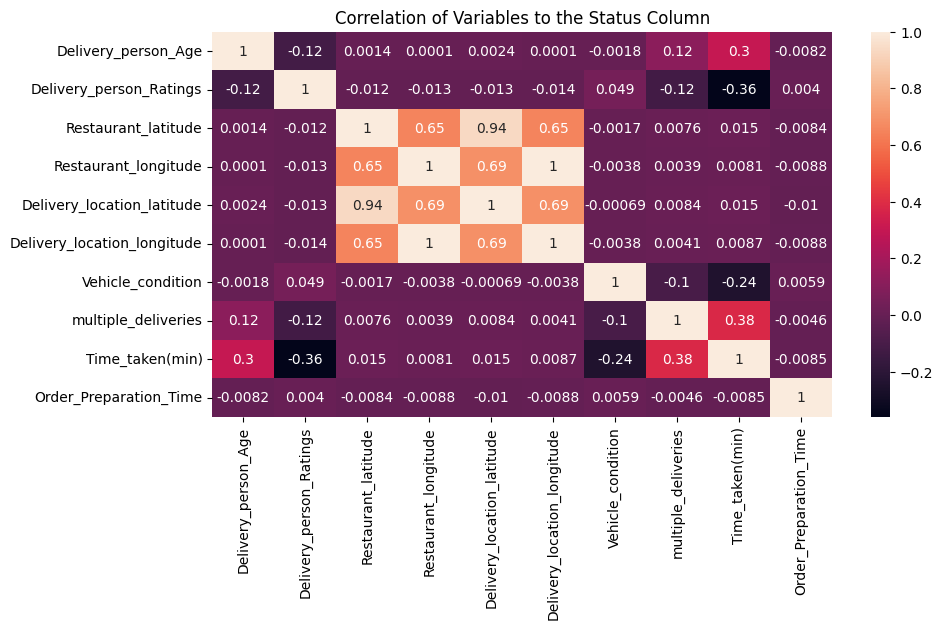

In [ ]:
#plotting the correlation of features
plt.figure(figsize=(10,5))
corrmatrix=df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken(min)', 'Order_Preparation_Time']].corr()
sns.heatmap(corrmatrix,annot=True)
plt.title('Correlation of Variables to the Status Column')
plt.show()


In [ ]:
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

In [ ]:
#creating a distance column
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    distance = r * c

    return distance

In [ ]:
# Calculate distance for each row
df['distance_km'] = df.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'],
                                                   row['Delivery_location_latitude'], row['Delivery_location_longitude']),
                            axis=1)

In [ ]:
# Round the distance values to 3 decimal places
df['distance_km'] = df['distance_km'].round(3)


In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),order_datetime,pick_datetime,Order_Preparation_Time,Time_of_Day,distance_km
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,Morning,3.025
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,Evening,20.184
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorm,Low,0,Drinks,motorcycle,1.0,No,Urban,26,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,Morning,1.553
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,Evening,7.790
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,Afternoon,6.210


In [ ]:
df.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace = True)

In [ ]:
df.shape

(43862, 16)

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),order_datetime,pick_datetime,Order_Preparation_Time,Time_of_Day,distance_km
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,Morning,3.025
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,Evening,20.184
2,23.0,4.4,Sandstorm,Low,0,Drinks,motorcycle,1.0,No,Urban,26,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,Morning,1.553
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,Evening,7.790
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,Afternoon,6.210


In [ ]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'order_datetime', 'pick_datetime',
       'Order_Preparation_Time', 'Time_of_Day', 'distance_km'],
      dtype='object')

In [ ]:
df['order_day'] = df['order_datetime'].dt.day
df['order_hour'] = df['order_datetime'].dt.hour
df['order_minute'] = df['order_datetime'].dt.minute


In [ ]:
df.drop(['order_datetime','pick_datetime'],axis=1,inplace=True)

In [ ]:
# checking for outliers
freqgrph=df.select_dtypes(include=['float','int'])

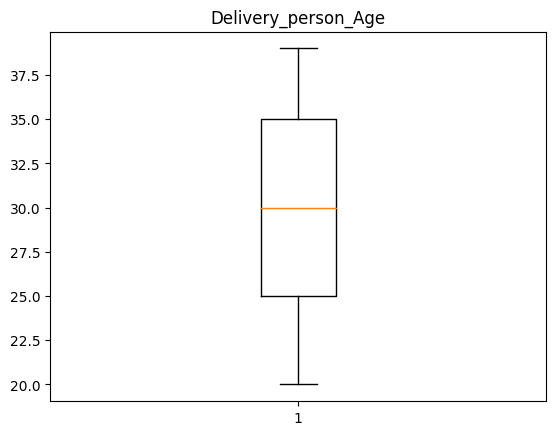

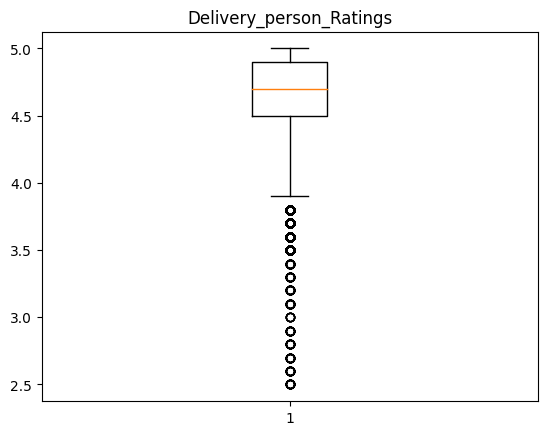

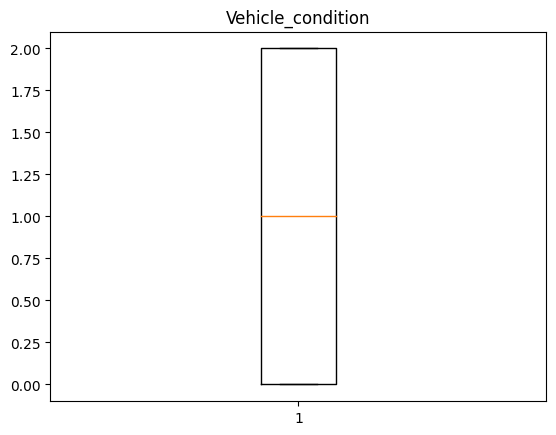

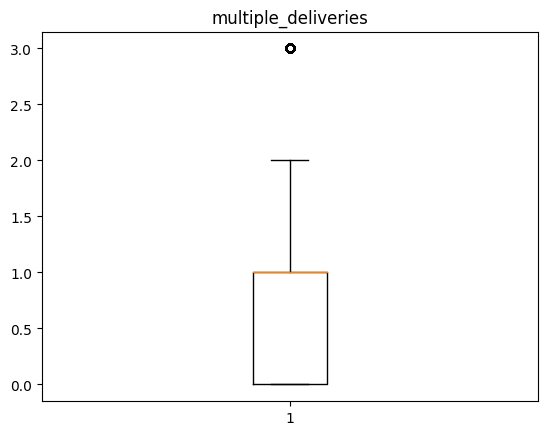

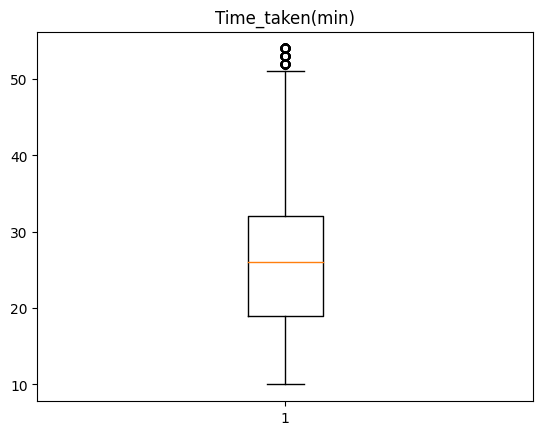

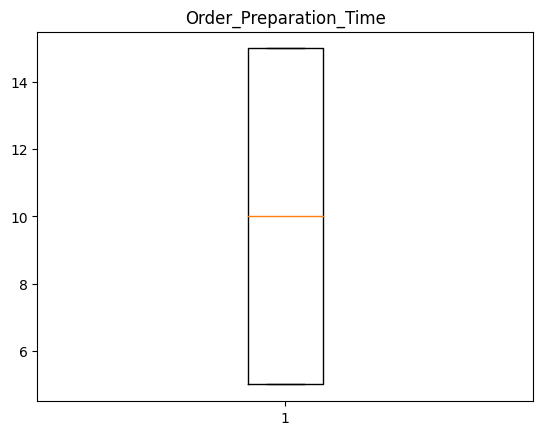

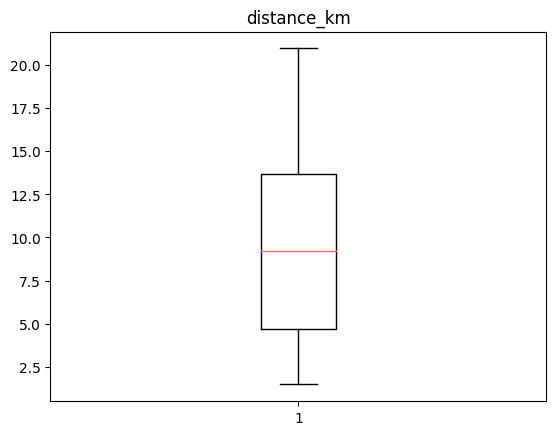

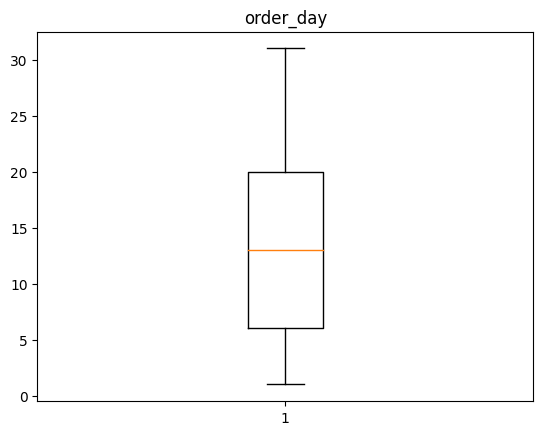

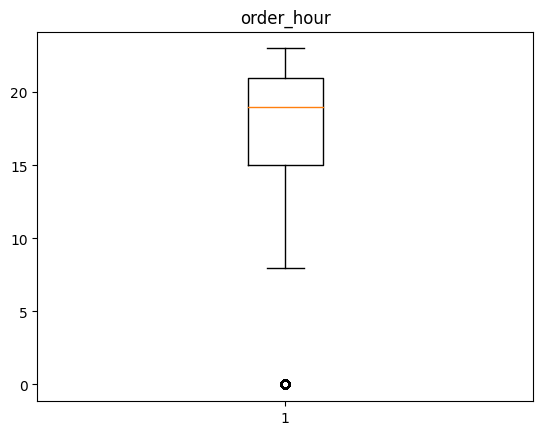

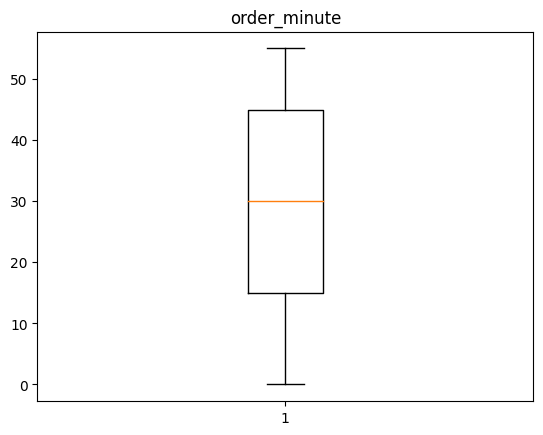

In [ ]:
for i in freqgrph.columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i)

In [ ]:
#encoding
for i in cat_cols:
  print(f'unique values in {i} : {df[i].unique()}')

unique values in Weatherconditions : ['Sunny' 'Stormy' 'Sandstorm' 'Cloudy' 'Fog' 'Windy']
unique values in Road_traffic_density : ['High' 'Jam' 'Low' 'Medium']
unique values in Type_of_order : ['Snack' 'Drinks' 'Buffet' 'Meal']
unique values in Type_of_vehicle : ['motorcycle' 'scooter' 'electric_scooter']
unique values in Festival : ['No' 'Yes']
unique values in City : ['Urban' 'Metropolitian' 'Semi-Urban']
unique values in Time_of_Day : ['Morning' 'Evening' 'Afternoon' 'Night']


In [ ]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'Order_Preparation_Time', 'Time_of_Day',
       'distance_km', 'order_day', 'order_hour', 'order_minute'],
      dtype='object')

In [ ]:
for i in ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken(min)', 'Order_Preparation_Time','distance_km', 'order_day', 'order_hour', 'order_minute']:
  q1=df[i].quantile(0.25)
  q2=df[i].quantile(0.50)
  q3=df[i].quantile(0.75)
  iqr = q3 - q1
  low = q1 - 1.5 * iqr
  up = q3 + 1.5 * iqr
  outliers = df[(df[i] < low) | (df[i] > up)]
  outlier_values = outliers[[i]]
  unique_outlier_values = outliers[i].unique()
  print(f'{outlier_values} \n {unique_outlier_values}')

Empty DataFrame
Columns: [Delivery_person_Age]
Index: [] 
 []
       Delivery_person_Ratings
33                         3.5
113                        3.8
288                        3.8
366                        3.7
368                        3.8
...                        ...
45300                      2.9
45365                      2.7
45371                      3.4
45372                      3.8
45426                      3.7

[1132 rows x 1 columns] 
 [3.5 3.8 3.7 2.6 2.5 3.6 3.1 2.7 3.2 3.3 3.4 2.8 2.9 3. ]
Empty DataFrame
Columns: [Vehicle_condition]
Index: [] 
 []
       multiple_deliveries
9                      3.0
43                     3.0
159                    3.0
165                    3.0
182                    3.0
...                    ...
44676                  3.0
45051                  3.0
45207                  3.0
45398                  3.0
45576                  3.0

[343 rows x 1 columns] 
 [3.]
       Time_taken(min)
43                  52
188                 

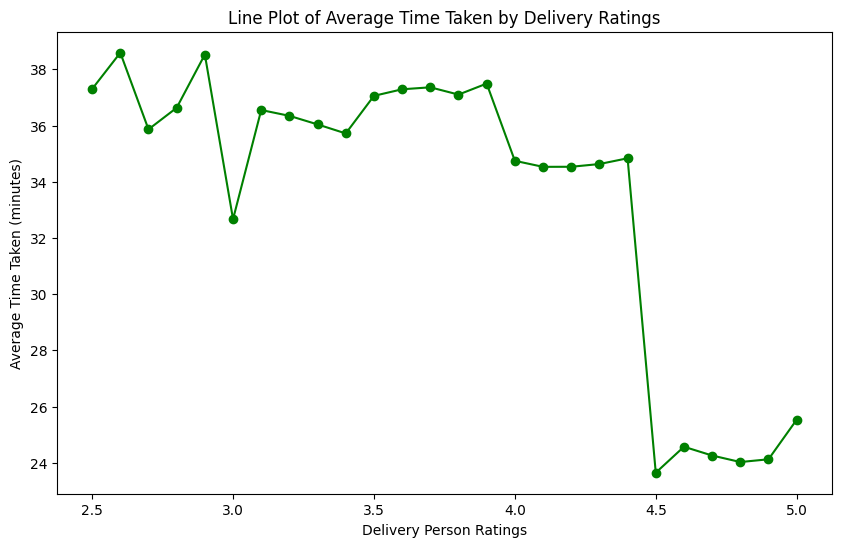

In [ ]:

rating_groups = df.groupby('Delivery_person_Ratings')['Time_taken(min)'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(rating_groups['Delivery_person_Ratings'], rating_groups['Time_taken(min)'], marker='o',color='g')
plt.title('Line Plot of Average Time Taken by Delivery Ratings')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Average Time Taken (minutes)')
plt.show()



* For delivery person ratings between 2.5 and 3.0, the delivery times are generally higher
* For ratings between 4.5 and 5.0, the delivery times are lower



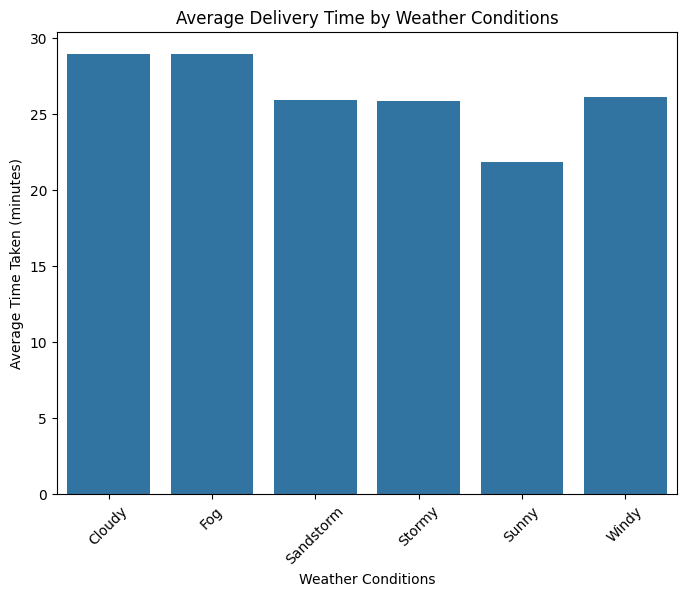

In [ ]:
# Calculate the mean delivery time for each weather condition
mean_delivery_time = df.groupby('Weatherconditions')['Time_taken(min)'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=mean_delivery_time, x='Weatherconditions', y='Time_taken(min)')
plt.title('Average Delivery Time by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Time Taken (minutes)')
plt.xticks(rotation=45)
plt.show()




*   Delivery times are shortest in sunny weather
*   Delivery times are longer for cloudy and fog conditions


*   Delivery times are slightly longer in stormy,sandstorm and windy conditions






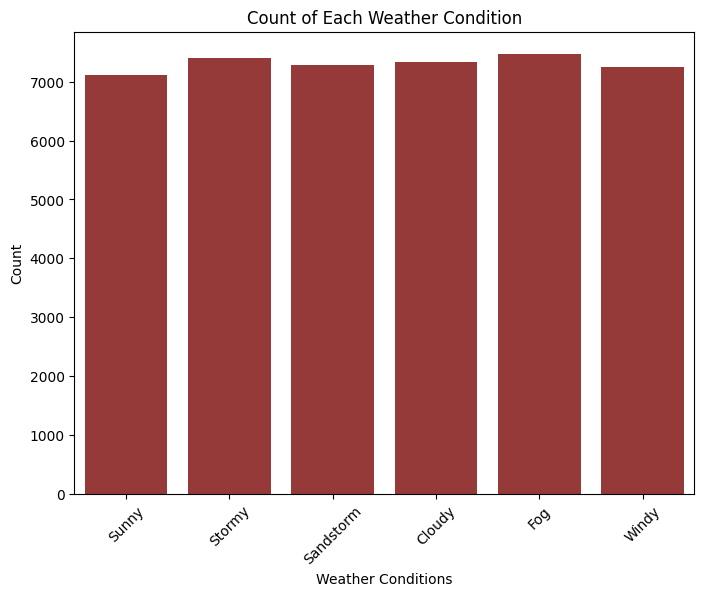

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weatherconditions',color='brown')
plt.title('Count of Each Weather Condition')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


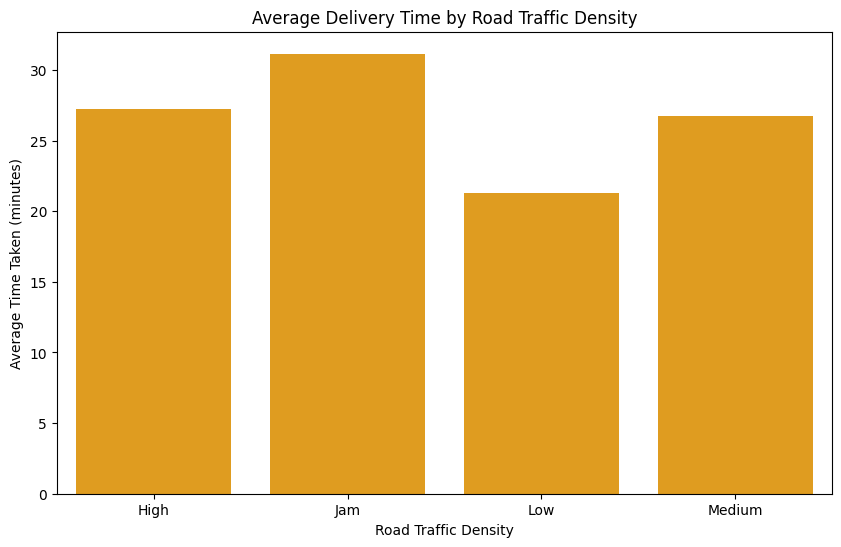

In [ ]:
# Calculate the mean delivery time for each road traffic density level
mean_delivery_time = df.groupby('Road_traffic_density')['Time_taken(min)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_delivery_time, x='Road_traffic_density', y='Time_taken(min)',color='orange')
plt.title('Average Delivery Time by Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Average Time Taken (minutes)')
plt.show()




*   Delivery times are shortest in low traffic density conditions
*   Delivery times are significantly longer in traffic jam conditions



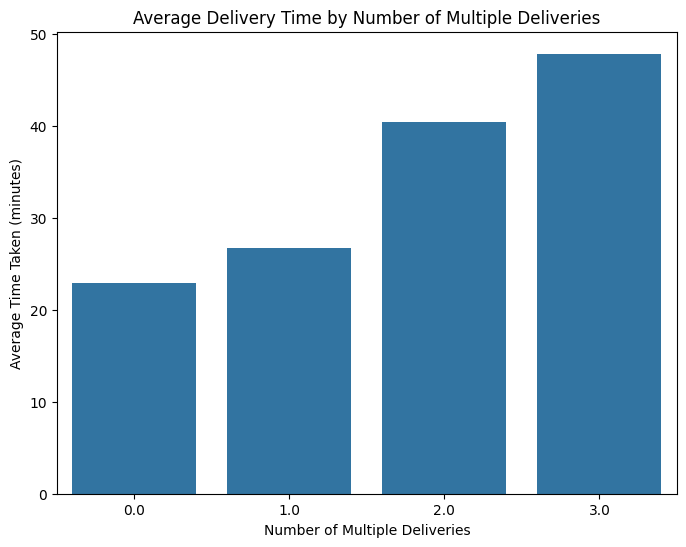

In [ ]:
mean_delivery_time = df.groupby('multiple_deliveries')['Time_taken(min)'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_delivery_time, x='multiple_deliveries', y='Time_taken(min)')
plt.title('Average Delivery Time by Number of Multiple Deliveries')
plt.xlabel('Number of Multiple Deliveries')
plt.ylabel('Average Time Taken (minutes)')
plt.show()



*   Delivery times are shortest for single delivery
*   Delivery times are the longest with three deliveries



<ipython-input-62-9ed4d5204181>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='multiple_deliveries',palette='viridis')


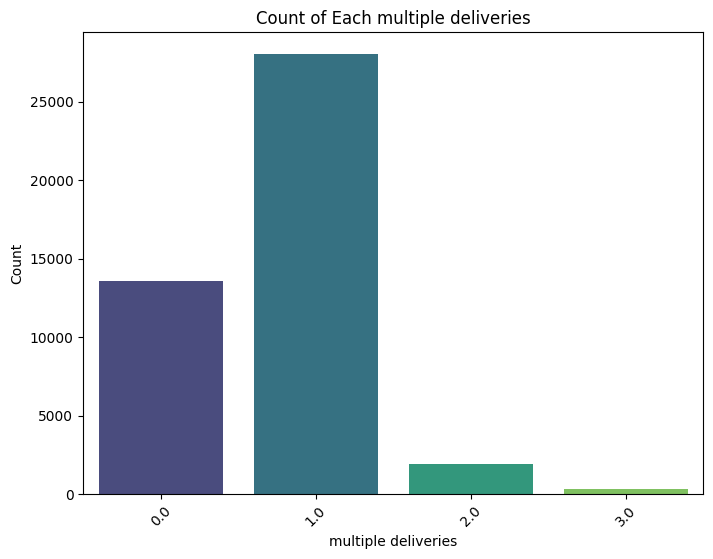

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='multiple_deliveries',palette='viridis')
plt.title('Count of Each multiple deliveries')
plt.xlabel('multiple deliveries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

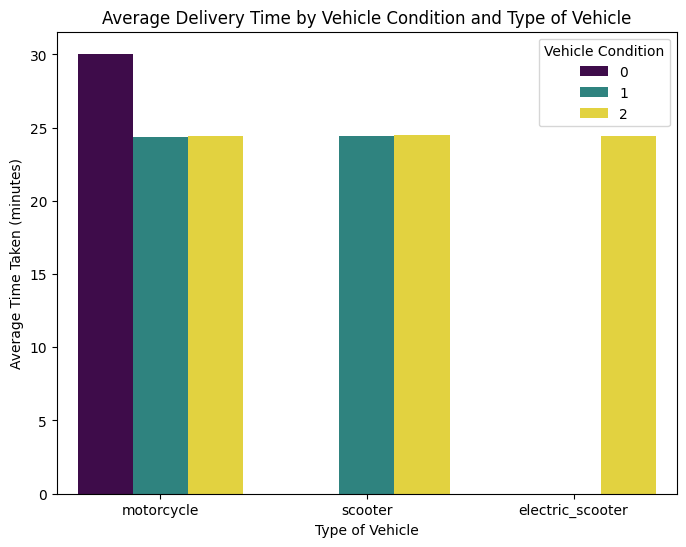

In [ ]:
mean_time_combined = df.groupby(['Vehicle_condition', 'Type_of_vehicle'])['Time_taken(min)'].mean().reset_index()

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_time_combined, x='Type_of_vehicle', y='Time_taken(min)', hue='Vehicle_condition', palette='viridis')
plt.title('Average Delivery Time by Vehicle Condition and Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Average Time Taken (minutes)')
plt.legend(title='Vehicle Condition')
plt.show()

<ipython-input-64-68f6fb55c80b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type_of_vehicle',palette='viridis')


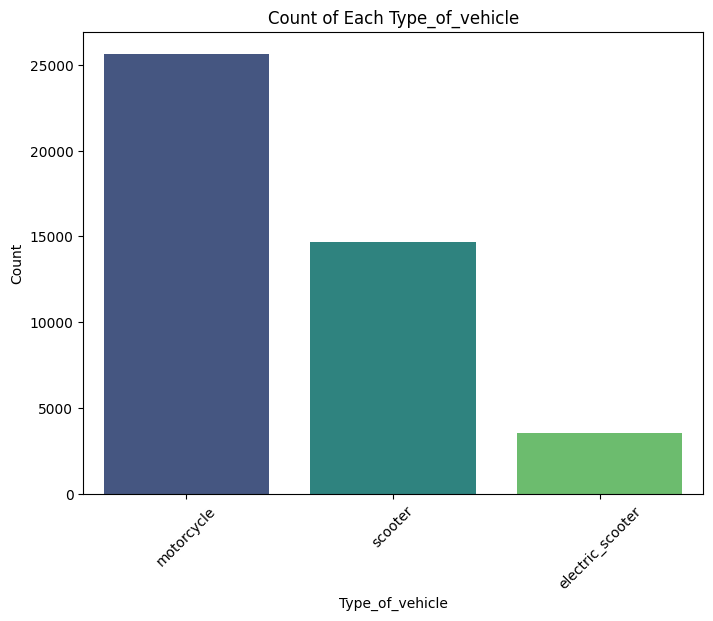

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type_of_vehicle',palette='viridis')
plt.title('Count of Each Type_of_vehicle')
plt.xlabel('Type_of_vehicle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

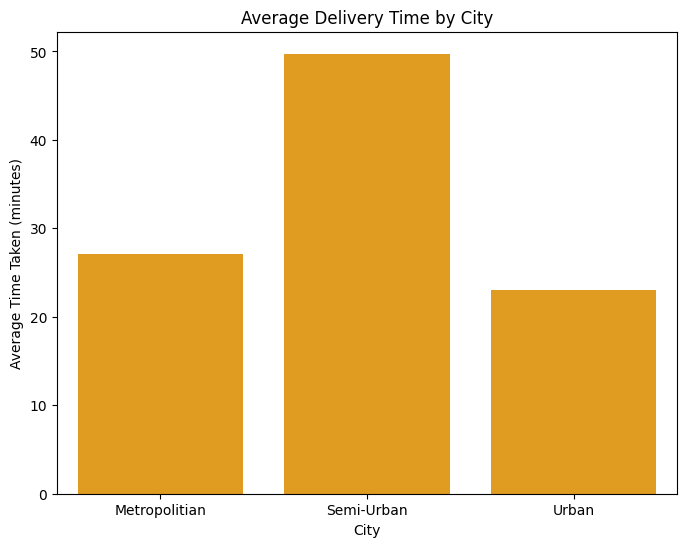

In [ ]:
mean_delivery_time = df.groupby('City')['Time_taken(min)'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=mean_delivery_time, x='City', y='Time_taken(min)',color='orange')
plt.title('Average Delivery Time by City')
plt.xlabel('City')
plt.ylabel('Average Time Taken (minutes)')
plt.show()

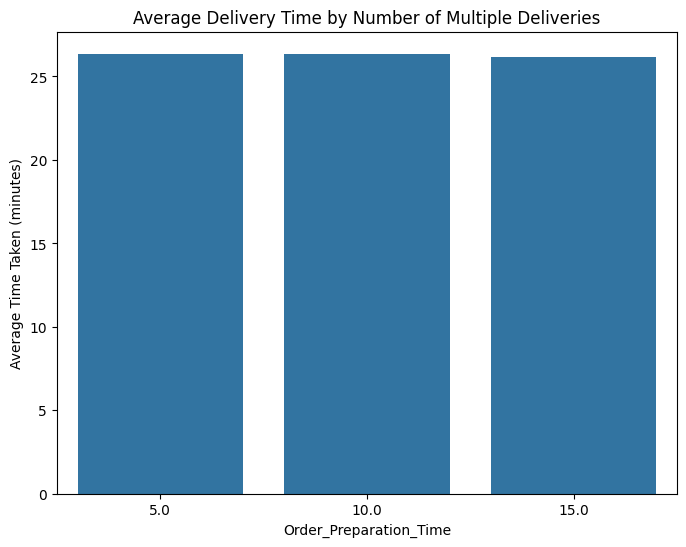

In [ ]:
mean_delivery_time = df.groupby('Order_Preparation_Time')['Time_taken(min)'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_delivery_time, x='Order_Preparation_Time', y='Time_taken(min)')
plt.title('Average Delivery Time by Number of Multiple Deliveries')
plt.xlabel('Order_Preparation_Time')
plt.ylabel('Average Time Taken (minutes)')
plt.show()

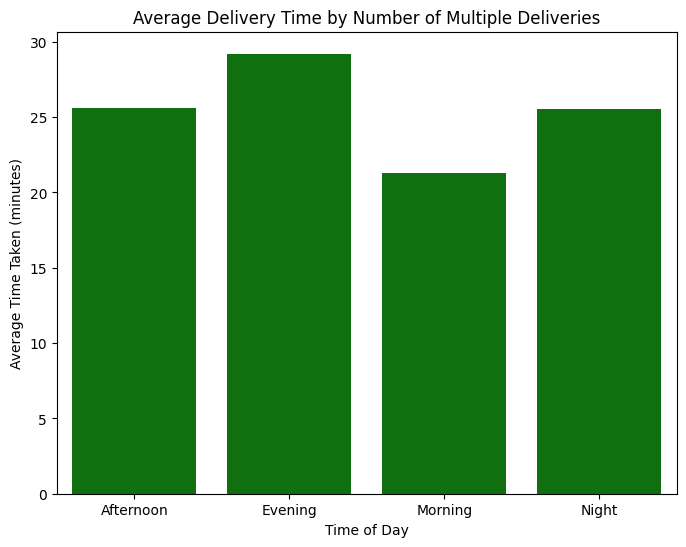

In [ ]:
mean_delivery_time = df.groupby('Time_of_Day')['Time_taken(min)'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_delivery_time, x='Time_of_Day', y='Time_taken(min)',color='g')
plt.title('Average Delivery Time by Number of Multiple Deliveries')
plt.xlabel('Time of Day')
plt.ylabel('Average Time Taken (minutes)')
plt.show()

<ipython-input-68-e187958d0f0a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_bin = df.groupby('distance_bin')['Time_taken(min)'].mean().reset_index()
<ipython-input-68-e187958d0f0a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_time_by_bin, x='distance_bin', y='Time_taken(min)', palette='viridis', hue=None)


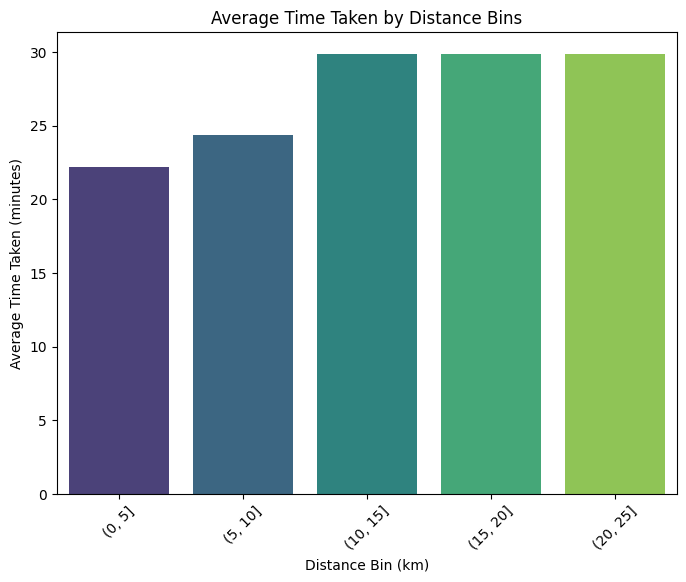

In [ ]:
bins = [0, 5, 10, 15, 20, 25]
df['distance_bin'] = pd.cut(df['distance_km'], bins)

# Calculate average time taken for each bin
avg_time_by_bin = df.groupby('distance_bin')['Time_taken(min)'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_time_by_bin, x='distance_bin', y='Time_taken(min)', palette='viridis', hue=None)
plt.title('Average Time Taken by Distance Bins')
plt.xlabel('Distance Bin (km)')
plt.ylabel('Average Time Taken (minutes)')
plt.xticks(rotation=45)
plt.show()

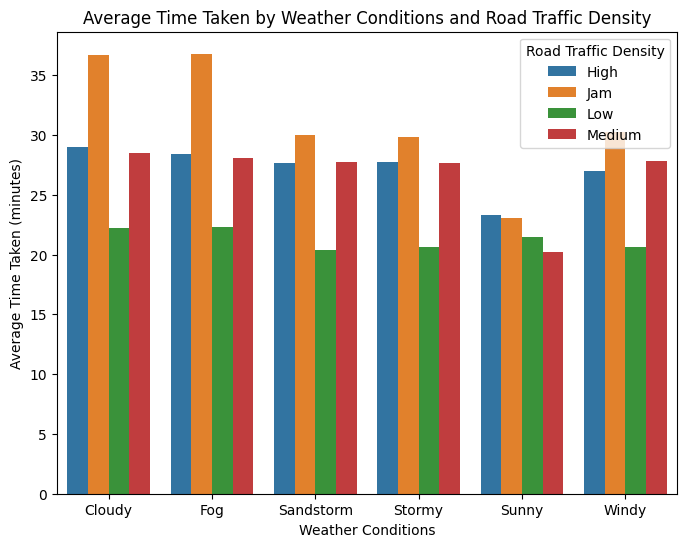

In [ ]:
avg_time_by_conditions = df.groupby(['Weatherconditions', 'Road_traffic_density'])['Time_taken(min)'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_time_by_conditions, x='Weatherconditions', y='Time_taken(min)', hue='Road_traffic_density')

plt.title('Average Time Taken by Weather Conditions and Road Traffic Density')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Time Taken (minutes)')
plt.legend(title='Road Traffic Density')
plt.show()

In [ ]:
Q1_ratings = df['Delivery_person_Ratings'].quantile(0.25)
Q3_ratings = df['Delivery_person_Ratings'].quantile(0.75)
IQR_ratings = Q3_ratings - Q1_ratings

lower_bound_ratings = Q1_ratings - 1.5 * IQR_ratings
upper_bound_ratings = Q3_ratings + 1.5 * IQR_ratings

In [ ]:
df.drop('distance_bin',axis=1,inplace = True)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Weatherconditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival', 'City','Time_of_Day']).astype(int)

In [ ]:
df_encoded.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),Order_Preparation_Time,distance_km,order_day,order_hour,order_minute,...,Type_of_vehicle_scooter,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,37,4,2,0,24,15,3,19,11,30,...,0,1,0,0,0,1,0,0,1,0
1,34,4,2,1,33,5,20,25,19,45,...,1,1,0,1,0,0,0,1,0,0
2,23,4,0,1,26,15,1,19,8,30,...,0,1,0,0,0,1,0,0,1,0
3,38,4,0,1,21,10,7,5,18,0,...,0,1,0,1,0,0,0,1,0,0
4,32,4,1,1,30,15,6,26,13,30,...,1,1,0,1,0,0,1,0,0,0


In [ ]:
df_final = df_encoded.copy()

In [ ]:
df_final.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),Order_Preparation_Time,distance_km,order_day,order_hour,order_minute,...,Type_of_vehicle_scooter,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,37,4,2,0,24,15,3,19,11,30,...,0,1,0,0,0,1,0,0,1,0
1,34,4,2,1,33,5,20,25,19,45,...,1,1,0,1,0,0,0,1,0,0
2,23,4,0,1,26,15,1,19,8,30,...,0,1,0,0,0,1,0,0,1,0
3,38,4,0,1,21,10,7,5,18,0,...,0,1,0,1,0,0,0,1,0,0
4,32,4,1,1,30,15,6,26,13,30,...,1,1,0,1,0,0,1,0,0,0


In [ ]:
df_final.shape

(43862, 36)

In [ ]:
dff=df_final.copy()

In [ ]:
df_final.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),Order_Preparation_Time,distance_km,order_day,order_hour,order_minute,...,Type_of_vehicle_scooter,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,37,4,2,0,24,15,3,19,11,30,...,0,1,0,0,0,1,0,0,1,0
1,34,4,2,1,33,5,20,25,19,45,...,1,1,0,1,0,0,0,1,0,0
2,23,4,0,1,26,15,1,19,8,30,...,0,1,0,0,0,1,0,0,1,0
3,38,4,0,1,21,10,7,5,18,0,...,0,1,0,1,0,0,0,1,0,0
4,32,4,1,1,30,15,6,26,13,30,...,1,1,0,1,0,0,1,0,0,0


In [ ]:
df_final.shape

(43862, 36)

In [ ]:
for i in df.columns:
  value=df[i].value_counts()
  print(f'{i} : {value}')

Delivery_person_Age : Delivery_person_Age
30.0    2440
35.0    2262
36.0    2260
37.0    2227
38.0    2219
24.0    2210
32.0    2202
22.0    2196
29.0    2191
33.0    2187
28.0    2179
25.0    2174
34.0    2166
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2087
Name: count, dtype: int64
Delivery_person_Ratings : Delivery_person_Ratings
4.7    7410
4.8    7148
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64
Weatherconditions : Weatherconditions
Fog          7476
Stormy       7402
Cloudy       7339
Sandstorm    7285
Windy        7251
Sunny        7109
Name: count, dtype: int64
Road_traffic_density : Road_traffic_density
Low       15062
Jam       13800
Medium    10678
High       4322
Name

In [ ]:
df_final.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken(min)', 'Order_Preparation_Time',
       'distance_km', 'order_day', 'order_hour', 'order_minute',
       'Weatherconditions_Cloudy', 'Weatherconditions_Fog',
       'Weatherconditions_Sandstorm', 'Weatherconditions_Stormy',
       'Weatherconditions_Sunny', 'Weatherconditions_Windy',
       'Road_traffic_density_High', 'Road_traffic_density_Jam',
       'Road_traffic_density_Low', 'Road_traffic_density_Medium',
       'Type_of_order_Buffet', 'Type_of_order_Drinks', 'Type_of_order_Meal',
       'Type_of_order_Snack', 'Type_of_vehicle_electric_scooter',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter', 'Festival_No',
       'Festival_Yes', 'City_Metropolitian', 'City_Semi-Urban', 'City_Urban',
       'Time_of_Day_Afternoon', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night'],
      dtype='object')

In [ ]:

x=df_final.drop('Time_taken(min)',axis=1)
y=df_final['Time_taken(min)']

In [ ]:
from imblearn.over_sampling import SMOTE

# Let's assume the column 'Road_traffic_density_High' is what we're focusing on
# Creating a SMOTE object
smote = SMOTE(sampling_strategy='not minority', random_state=42)

# Perform SMOTE on the entire dataset
x_resampled, y_resampled = smote.fit_resample(x, y)

# Convert back to DataFrame
x_resampled = pd.DataFrame(x_resampled, columns=x.columns)
y_resampled = pd.Series(y_resampled, name='Time_taken(min)')


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
#creating a basic linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae= mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error : {mape}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 47.18135351727842
Mean Absolute Error: 5.487683172772414
Mean Absolute Percentage Error : 0.22756396913647192
R-squared: 0.7119077158677203


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae= mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error : {mape}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 15.32223461739173
Mean Absolute Error: 2.7770940619589646
Mean Absolute Percentage Error : 0.11297500918612646
R-squared: 0.9064414807998561


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor



In [ ]:
# Initialize the AdaBoostRegressor with a DecisionTreeRegressor as the base estimator
base_estimator = DecisionTreeRegressor()  # You can adjust max_depth as needed
ada_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
ada_regressor.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
y_pred = ada_regressor.predict(x_test)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae= mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error : {mape}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 16.02262552879487
Mean Absolute Error: 2.5114809444594135
Mean Absolute Percentage Error : 0.1038655233571784
R-squared: 0.9021648502581374


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # This is required to enable the module
from sklearn.ensemble import HistGradientBoostingRegressor
hist_gb_regressor = HistGradientBoostingRegressor(
    max_iter=100,  # Number of boosting iterations
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Maximum depth of the individual trees
    random_state=42
)

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
hist_gb_regressor.fit(x_train, y_train)

HistGradientBoostingRegressor(max_depth=6, random_state=42)

In [ ]:
y_pred = hist_gb_regressor.predict(x_test)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae= mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error : {mape}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 21.85357739163876
Mean Absolute Error: 3.6286676522872487
Mean Absolute Percentage Error : 0.14376817122605554
R-squared: 0.8665606948958525


In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(force_row_wise=True)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 72388, number of used features: 35
[LightGBM] [Info] Start training from score 31.628682


LGBMRegressor(force_row_wise=True)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae= mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error : {mape}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 20.568136476816203
Mean Absolute Error: 3.535555315764995
Mean Absolute Percentage Error : 0.139383754798741
R-squared: 0.8744096772090177


In [ ]:
import pandas as pd

# Assuming df is your original DataFrame with the correct columns
columns = ['Delivery_person_Age',
    'Delivery_person_Ratings',
    'Weatherconditions',
    'Road_traffic_density',
    'Vehicle_condition',
    'Type_of_order',
    'Type_of_vehicle',
    'multiple_deliveries',
    'Festival',
    'City',
    'Order_Preparation_Time',
    'Time_of_Day',
    'distance_km',
    'order_day',
    'order_hour',
    'order_minute']

# Create a DataFrame with one row of data
new_data = pd.DataFrame([{
    'Delivery_person_Age': 23,
    'Delivery_person_Ratings': 4.4,
    'Weatherconditions': 'Sandstorm',
    'Road_traffic_density': 'Low',
    'Vehicle_condition': 2,
    'Type_of_order': 'Drinks',
    'Type_of_vehicle': 'motorcycle',
    'multiple_deliveries': 0,
    'Festival': 'No',
    'City': 'Metropolitian',
    'Order_Preparation_Time': 5.0,
    'Time_of_Day': 'Morning',
    'distance_km': 1.00,
    'order_day': 19,
    'order_hour': 8,
    'order_minute': 30
}], columns=columns)



In [ ]:
new_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Preparation_Time,Time_of_Day,distance_km,order_day,order_hour,order_minute
0,23,4.4,Sandstorm,Low,2,Drinks,motorcycle,0,No,Metropolitian,5.0,Morning,1.0,19,8,30


In [ ]:
new_data = pd.get_dummies(new_data, columns=[
        'Weatherconditions', 'Road_traffic_density', 'Type_of_order',
        'Type_of_vehicle', 'Festival', 'City', 'Time_of_Day'
    ], dtype='int64')


In [ ]:
columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Order_Preparation_Time',
       'distance_km', 'order_day', 'order_hour', 'order_minute',
       'Weatherconditions_Cloudy', 'Weatherconditions_Fog',
       'Weatherconditions_Sandstorm', 'Weatherconditions_Stormy',
       'Weatherconditions_Sunny', 'Weatherconditions_Windy',
       'Road_traffic_density_High', 'Road_traffic_density_Jam',
       'Road_traffic_density_Low', 'Road_traffic_density_Medium',
       'Type_of_order_Buffet', 'Type_of_order_Drinks', 'Type_of_order_Meal',
       'Type_of_order_Snack', 'Type_of_vehicle_electric_scooter',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter', 'Festival_No',
       'Festival_Yes', 'City_Metropolitian', 'City_Semi-Urban', 'City_Urban',
       'Time_of_Day_Afternoon', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night']

In [ ]:
missing_cols = set(columns) - set(new_data.columns)
for col in missing_cols:
  new_data[col] = 0


    # Reorder columns to match the training data
new_data = new_data[columns]

In [ ]:
prediction = ada_regressor.predict(new_data)

In [ ]:
predictions = [int(pred) for pred in prediction]

In [ ]:
predictions[0]

14